# Machine Learning Assignment 3
## 101803016 - Amitoj Sidhu

## Question 1

In [ ]:
#Without Using Inbuilt Function

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [ ]:
A=np.dot(X,X.T)
print(A.shape)

(1797, 1797)


In [ ]:
values, vectors = np.linalg.eig(np.sqrt(A))
values[:5]
print(values.shape)

(1797,)


In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.8298325736820085, 0.028387531016935696, 0.025965262037967913, 0.022699658194926666, 0.016173729155810553, 0.010834340128454648, 0.008764847363960788, 0.00797561707334064, 0.006702174936296447, 0.00628425082229822, 0.004493512523589924, 0.0043406577471158956, 0.0035930442744519188, 0.0033131683194679326, 0.002876179091230396, 0.002526956447139833, 0.002455632146802912, 0.00230369723284105, 0.001853563541516391, 0.001776117304560885, 0.001613134069385899, 0.001462659065859496, 0.0014087919315691464, 0.0013293406956602536, 0.0012708984532293977, 0.001083789469665144, 0.0010145941080161943, 0.0009429322248775533, 0.0008644618172384967, 0.0007812791294473132, -0.0007019300793764773, 0.0006707621196236174, 0.0006463379089265979, -0.0005475738221504428, 0.0005995418612318218, 0.000578959161487809, 0.0005333408484489886, 0.000522760143028491, -0.00048139441833601666, -0.00048237894514586733, 0.00045826749581983446, -0.00037850511679331217, 0.00040200903824199637, 0.0003921535077298548

Text(0.5, 0, 'Principal components')

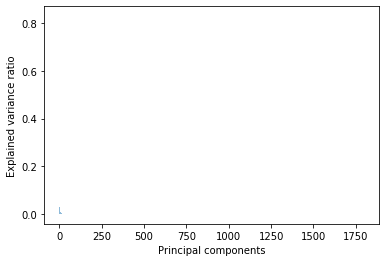

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

plt.bar(range(1797), explained_variances, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')


In [ ]:
sigma = np.zeros((1797, 2), int)

In [ ]:
sigma[0,0]=np.sqrt(values[0])
sigma[1,1]=np.sqrt(values[1])


print(sigma)

[[303   0]
 [  0  56]
 [  0   0]
 ...
 [  0   0]
 [  0   0]
 [  0   0]]


In [ ]:
X_new=np.dot(vectors,sigma)
print(X_new)

[[ 6.75178218  0.07736643]
 [ 7.42485498 -0.7044582 ]
 [ 7.44977175 -0.6416403 ]
 ...
 [ 8.07481387 -0.93135778]
 [ 7.64122453  0.40306828]
 [ 8.01167519  0.02660079]]


In [ ]:
from scipy.linalg import svd
u,s,v= svd(X)
sigma=np.diag(s)
print(s.shape)
print(u.shape)
X_new=np.dot(u[:,:64],sigma[:,:2])
print(X_new)

(64,)
(1797, 1797)
[[45.86127719 -1.19211574]
 [55.52967927  7.86176977]
 [55.8278837   6.91459576]
 ...
 [65.52698526 10.65872857]
 [58.60616587 -4.9112521 ]
 [64.44823101 -0.45551347]]


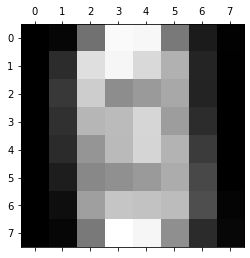

In [ ]:
#using inbuilt function for truncated SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'gray')

## Question 2

In [ ]:
import pandas as pd
df=pd.read_csv('./IMDB_Dataset.csv')
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [ ]:
corpus=list(df['review'][:1000])

In [ ]:
print(corpus[:1])

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(1000, 17922)


In [ ]:
import numpy as np

cooccurence_matrix=np.multiply(X.T,X)
cooccurence_matrix.setdiag(0)
print(cooccurence_matrix.shape)

(17922, 17922)


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
print(svd.fit_transform(cooccurence_matrix))

[[ 2.54976927e+01  2.65118087e+00  7.59290524e-02 ...  1.07369021e+00
  -3.13337885e-01 -1.64820505e+00]
 [ 7.28511987e+01 -1.43250923e+01 -2.15968306e-01 ... -4.17117536e+00
   1.68480326e+00  2.48464848e-01]
 [ 7.63450166e+00 -5.38052366e-01  2.06827067e-02 ... -3.97015643e-01
  -3.98532346e-01 -4.81748072e-01]
 ...
 [ 4.75646139e+00  1.33778394e+00  4.79267731e-02 ... -1.40933934e-01
  -2.01459605e-01  1.28125585e-01]
 [ 7.80357386e+00 -1.96821319e+00  1.00098571e-02 ...  1.01844553e+00
  -1.28729182e+00 -1.49428496e+00]
 [ 3.98137395e+00  1.50996566e+00  1.72167896e-02 ... -4.84523404e-01
  -1.88373217e-01 -6.85168155e-02]]


## Question 3

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
X=df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y=df[["species"]].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
print(X)
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

C:\Users\jasme\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jasme\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Step 1: Compute mean vectors
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



In [ ]:
#Step 2a: Computing the Scatter Matrices
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


In [ ]:
#Step 2b: Compute between-class scatter matrix
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


In [ ]:
# Step 3: Solving the generalized eigenvalue problem for the matrix S−1WSB
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.2049]
 [-0.3871]
 [ 0.5465]
 [ 0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.8628]
 [ 0.2117]
 [ 0.1712]
 [ 0.4259]]
Eigenvalue 3: 3.65e-15

Eigenvector 4: 
[[-0.2458]
 [-0.2425]
 [-0.3164]
 [ 0.8836]]
Eigenvalue 4: 1.57e-14


In [ ]:
#Step 4: Selecting linear discriminants for the new feature subspace
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Eigenvalues in decreasing order:

32.27195779972982
0.2775668638400393
1.5671316564418925e-14
3.647300779514304e-15
Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [ ]:
#Choosing k eigenvectors with the largest eigenvalues
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)


Matrix W:
 [[-0.2049 -0.009 ]
 [-0.3871 -0.589 ]
 [ 0.5465  0.2543]
 [ 0.7138 -0.767 ]]


In [ ]:
#Step 5: Transforming the samples onto the new subspace
X_lda = X.dot(W)


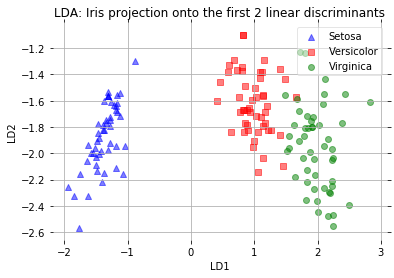

In [ ]:
#Visualization (optional)
from matplotlib import pyplot as plt
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()